In [3]:
import pandas as pd
import numpy as np
# Load dataset
df = pd.read_csv('american_bankruptcy.csv')

In [5]:
# Rename columns X1 to X18 to actual financial terms
df.rename(columns={
    'X1': 'Current assets',
    'X2': 'Cost of goods sold',
    'X3': 'Depreciation and amortization',
    'X4': 'EBITDA',
    'X5': 'Inventory',
    'X6': 'Net Income',
    'X7': 'Total Receivables',
    'X8': 'Market Value',
    'X9': 'Net Sales',
    'X10': 'Total Assets',
    'X11': 'Total Long-term Debt',
    'X12': 'EBIT',
    'X13': 'Gross Profit',
    'X14': 'Total Current Liabilities',
    'X15': 'Retained Earnings',
    'X16': 'Total Revenue',
    'X17': 'Total Liabilities',
    'X18': 'Total Operating Expenses'
}, inplace=True)

In [29]:
# Calculate Debt-to-Equity Ratio (Total Liabilities / Total Assets)
epsilon = 1e-10  # small constant to avoid division by zero
df['Debt_Equity_Ratio'] = df['Total Liabilities'] / (df['Total Assets'] - df['Total Liabilities'] + epsilon)

# Calculate the Altman Z-Score
df['Altman_Z_Score'] = (1.2 * (df['Current assets'] - df['Total Current Liabilities']) / df['Total Assets'] +
                        1.4 * (df['Retained Earnings'] / df['Total Assets']) +
                        3.3 * (df['EBIT'] / df['Total Assets']) +
                        0.6 * (df['Market Value'] / df['Total Liabilities']) +
                        1.0 * (df['Net Sales'] / df['Total Assets']))

# Check the new columns to confirm
print(df[['Debt_Equity_Ratio', 'Altman_Z_Score']].head())

   Debt_Equity_Ratio  Altman_Z_Score
0           1.182519        3.196587
1           1.062990        3.109968
2           1.289229        2.226949
3           1.327623        1.709901
4           1.351109        2.240159


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,78682.0,2.007506e+03,5.742768e+00,1999.000000,2002.000000,2007.000000,2012.000000,2.018000e+03
Current assets,78682.0,8.803625e+02,3.928565e+03,-7.760000,18.924000,100.449500,431.526750,1.696620e+05
Cost of goods sold,78682.0,1.594529e+03,8.930485e+03,-366.645000,17.038250,103.661000,634.548000,3.746230e+05
Depreciation and amortization,78682.0,1.212343e+02,6.523768e+02,0.000000,1.192000,7.929500,47.971750,2.843000e+04
EBITDA,78682.0,3.767594e+02,2.012023e+03,-21913.000000,-0.811000,15.034500,139.655250,8.173000e+04
Inventory,78682.0,2.016057e+02,1.060766e+03,0.000000,0.000000,7.023000,74.747250,6.256700e+04
Net Income,78682.0,1.293825e+02,1.265532e+03,-98696.000000,-7.415750,1.616000,40.144250,1.048210e+05
Total Receivables,78682.0,2.868327e+02,1.335979e+03,-0.006000,3.281250,22.820000,131.580500,6.581200e+04
Market Value,78682.0,3.414355e+03,1.841410e+04,0.000100,34.980000,227.511850,1244.889950,1.073391e+06
Net Sales,78682.0,2.364020e+03,1.195007e+04,-1964.999000,27.548500,186.598500,1046.402500,5.117290e+05


In [33]:
df


,company_name,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses,Debt_Equity_Ratio,Altman_Z_Score
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1.182519,3.196587
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,1.062990,3.109968
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,1.289229,2.226949
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,1.327623,1.709901
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,1.351109,2.240159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,0.258685,2.458453
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,0.893190,0.927365
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,0.789172,0.685027
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,0.809554,0.565692


In [35]:
# Check for null (NaN) values across the entire DataFrame
null_values = df.isna().sum().sum()
print(f"Total null values: {null_values}")

# Check for infinity values only in numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
infinity_values = np.isinf(numeric_cols).sum().sum()
print(f"Total infinity values: {infinity_values}")

# To see counts of null and infinity values for each column individually:
null_per_column = df.isna().sum()
infinity_per_column = np.isinf(numeric_cols).sum()

print("\nNull values per column:\n", null_per_column)
print("\nInfinity values per column (numeric only):\n", infinity_per_column)


Total null values: 0
Total infinity values: 0

Null values per column:
 company_name                     0
status_label                     0
year                             0
Current assets                   0
Cost of goods sold               0
Depreciation and amortization    0
EBITDA                           0
Inventory                        0
Net Income                       0
Total Receivables                0
Market Value                     0
Net Sales                        0
Total Assets                     0
Total Long-term Debt             0
EBIT                             0
Gross Profit                     0
Total Current Liabilities        0
Retained Earnings                0
Total Revenue                    0
Total Liabilities                0
Total Operating Expenses         0
Debt_Equity_Ratio                0
Altman_Z_Score                   0
dtype: int64

Infinity values per column (numeric only):
 year                             0
Current assets                

In [37]:
# Convert 'status_label' to numerical values
# 'alive' -> 0 (Not Bankrupt), 'failed' -> 1 (Bankrupt)
df['status_label'] = df['status_label'].apply(lambda x: 1 if x == 'failed' else 0)

# Check the conversion
print(df['status_label'].value_counts())


status_label
0    73462
1     5220
Name: count, dtype: int64


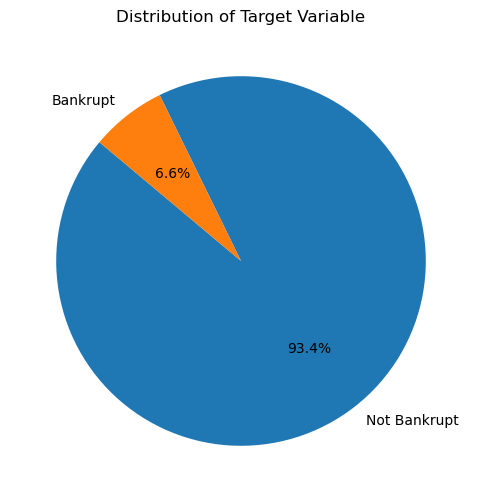

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the labels for better readability
status_counts = df['status_label'].value_counts()
status_counts.index = status_counts.index.map({0: 'Not Bankrupt', 1: 'Bankrupt'})

# Plot pie chart for the target variable
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_4616\3383403607.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status_label', palette='viridis')


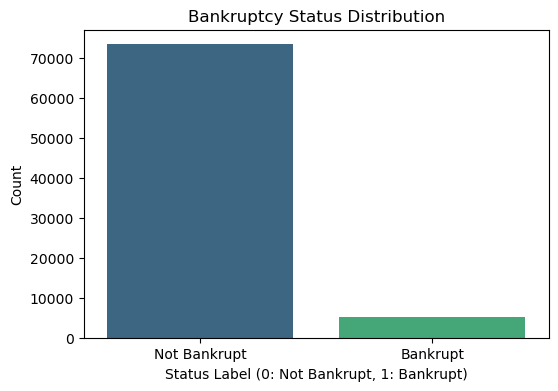

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='status_label', palette='viridis')
plt.title("Bankruptcy Status Distribution")
plt.xlabel("Status Label (0: Not Bankrupt, 1: Bankrupt)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Bankrupt", "Bankrupt"])
plt.show()


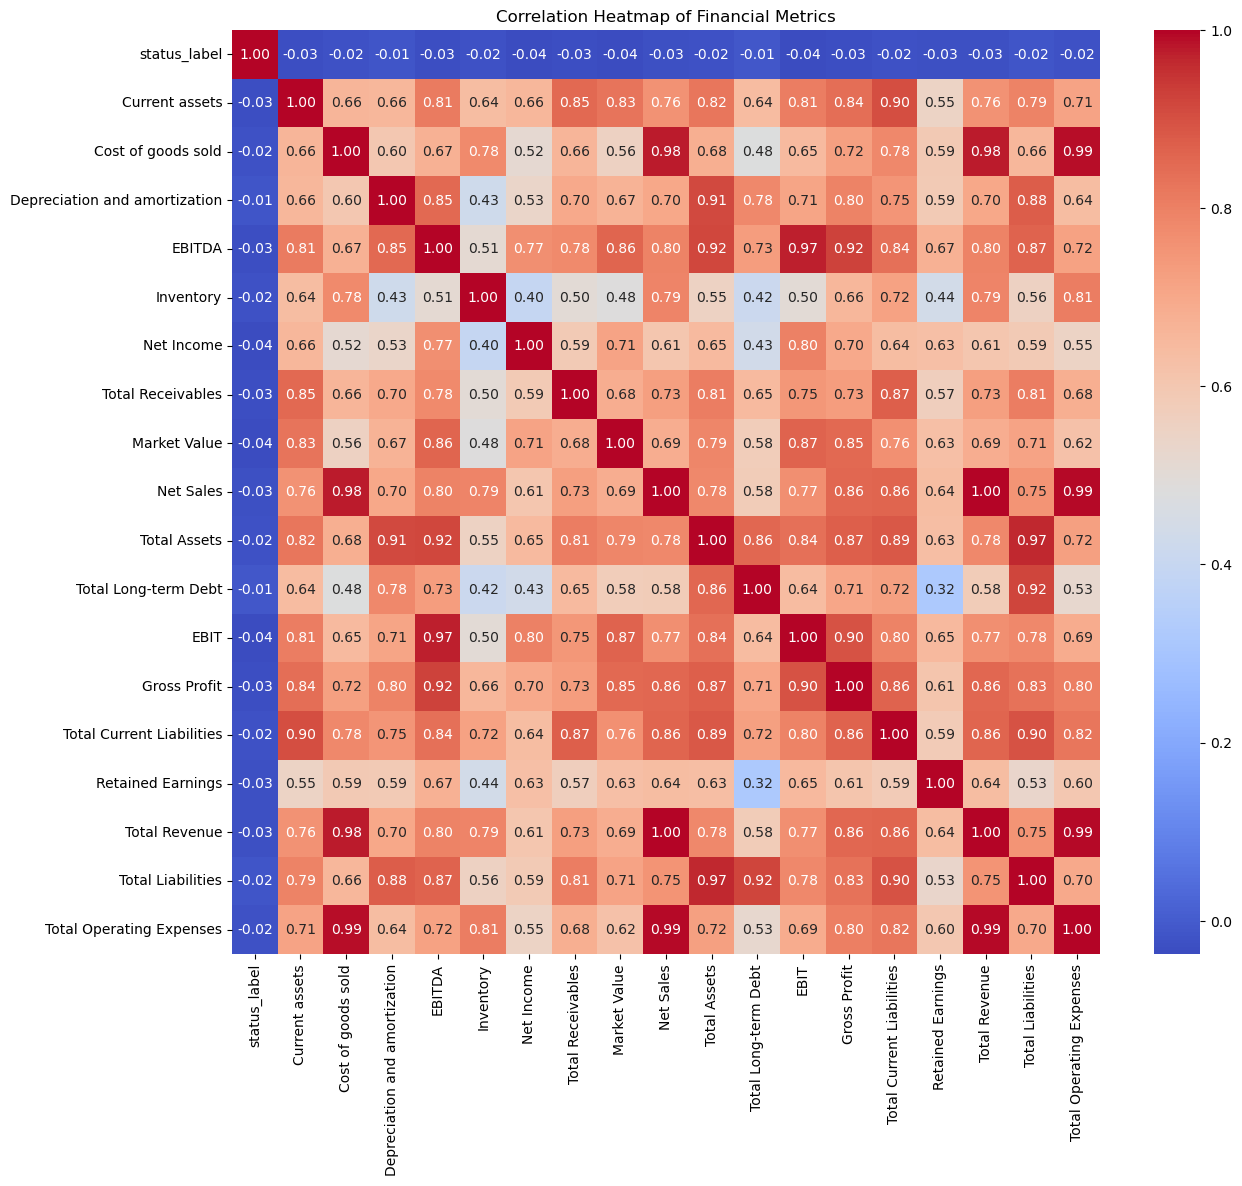

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (like 'company_name' and 'year') for correlation analysis
numeric_df = df.drop(columns=['company_name', 'year', 'Debt_Equity_Ratio','Altman_Z_Score'])

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Financial Metrics")
plt.show()


In [67]:
df

,company_name,status_label,year,Current assets,Cost of goods sold,Depreciation and amortization,EBITDA,Inventory,Net Income,Total Receivables,...,Total Long-term Debt,EBIT,Gross Profit,Total Current Liabilities,Retained Earnings,Total Revenue,Total Liabilities,Total Operating Expenses,Debt_Equity_Ratio,Altman_Z_Score
0,C_1,0,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1.182519,3.196587
1,C_1,0,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,1.062990,3.109968
2,C_1,0,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,1.289229,2.226949
3,C_1,0,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,1.327623,1.709901
4,C_1,0,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,1.351109,2.240159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,0,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608,0.258685,2.458453
78678,C_8971,0,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020,0.893190,0.927365
78679,C_8971,0,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807,0.789172,0.685027
78680,C_8971,0,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713,0.809554,0.565692



Visualizing SMOTE Balanced Training Set:


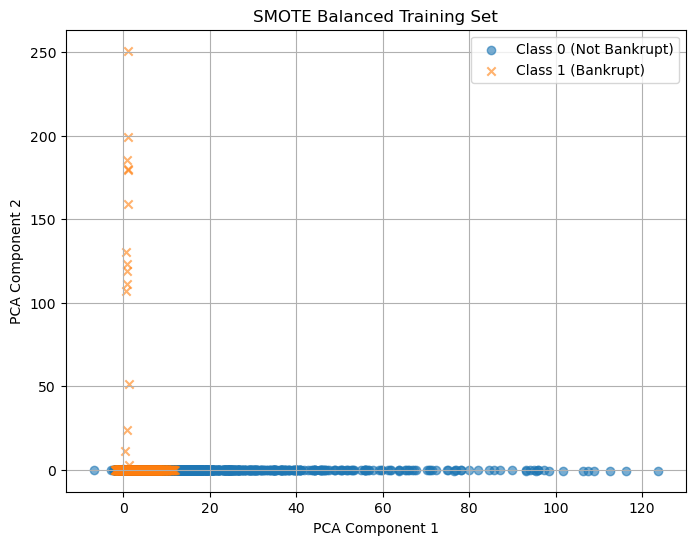


Visualizing Borderline-SMOTE Balanced Training Set:


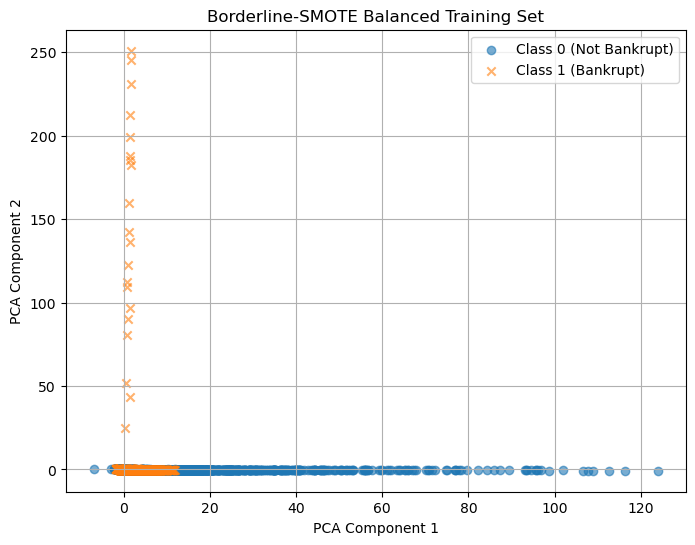


Visualizing ADASYN Balanced Training Set:


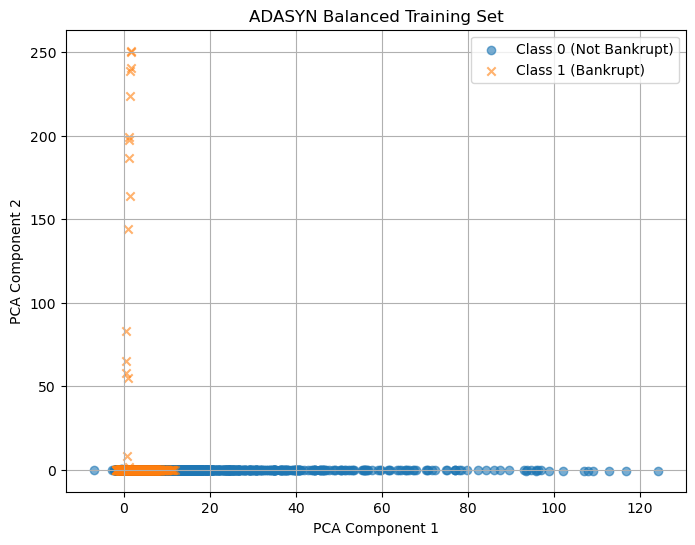


Visualizing SMOTEENN Balanced Training Set:


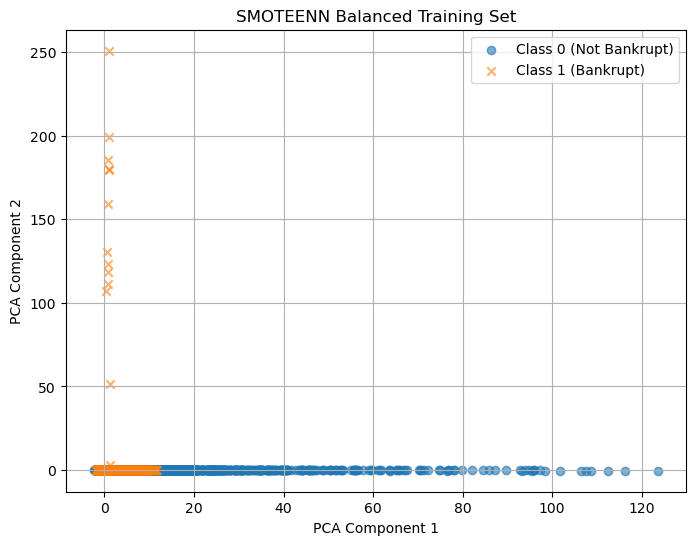

In [79]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Separate features and target variable
X = df.drop(columns=['company_name', 'status_label', 'year'])  # Drop unnecessary columns
y = df['status_label']  # Target variable

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Define the balancing techniques
balancing_techniques = {
    'SMOTE': SMOTE(random_state=42),
    'Borderline-SMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1'),
    'ADASYN': ADASYN(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualization and Performance Dictionary
results = {}

# Function to visualize data using PCA
def visualize_data(X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)  # Reduce to 2 components for 2D plotting
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], label="Class 0 (Not Bankrupt)", alpha=0.6)
    plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], label="Class 1 (Bankrupt)", alpha=0.6, marker='x')
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()
    # Loop through each balancing technique and visualize its effect
for name, sampler in balancing_techniques.items():
    # Resample the training set
    X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)
    
    # Visualize the balanced training set
    print(f"\nVisualizing {name} Balanced Training Set:")
    visualize_data(X_train_balanced, y_train_balanced, title=f"{name} Balanced Training Set")




In [84]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with a specific sampling strategy to oversample the minority class
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling_strategy as needed
X_resampled, y_resampled = smote.fit_resample(X, y)

In [86]:
# Count the occurrences of label 0 and 1
count_label_0 = np.count_nonzero(y_resampled == 0)
count_label_1 = np.count_nonzero(y_resampled == 1)

print("Count of label 0:", count_label_0)
print("Count of label 1:", count_label_1)

Count of label 0: 73462
Count of label 1: 36731


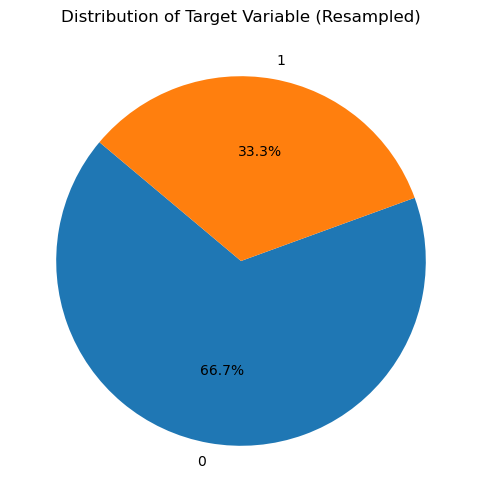

In [88]:
import matplotlib.pyplot as plt

# Calculate the distribution of target variable
status_counts_resampled = y_resampled.value_counts()

# Plot pie chart for target variable
plt.figure(figsize=(6, 6))
plt.pie(status_counts_resampled, labels=status_counts_resampled.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Variable (Resampled)')
plt.show()

In [90]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the trained models
trained_models = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Store the trained model in the dictionary
    trained_models[model_name] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nROC AUC Score:")
    print(roc_auc_score(y_test, y_pred_proba))
    print("-" * 60)

# The trained models are now stored in the trained_models dictionary

Model: Logistic Regression
Confusion Matrix:
[[ 3318 11375]
 [   83   961]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.23      0.37     14693
           1       0.08      0.92      0.14      1044

    accuracy                           0.27     15737
   macro avg       0.53      0.57      0.26     15737
weighted avg       0.92      0.27      0.35     15737


ROC AUC Score:
0.6772103013580894
------------------------------------------------------------
Model: Decision Tree
Confusion Matrix:
[[12151  2542]
 [  469   575]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     14693
           1       0.18      0.55      0.28      1044

    accuracy                           0.81     15737
   macro avg       0.57      0.69      0.58     15737
weighted avg       0.91      0.81      0.85     15737


ROC AUC Score:
0.6888793644535295
---------------------

In [91]:
# 1. Separate features and target variable (including the new financial metrics)
X = df.drop(columns=['company_name', 'status_label', 'year'])  # Drop unnecessary columns
y = df['status_label']  # Target variable
# 2. Split data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [94]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE with a specific sampling strategy to oversample the minority class
smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling_strategy as needed
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

# Check the shape of the balanced training data
print("Balanced training set shape:", X_train_balanced.shape)
print("Original test set shape:", X_test.shape)

Balanced training set shape: (88153, 20)
Original test set shape: (15737, 20)


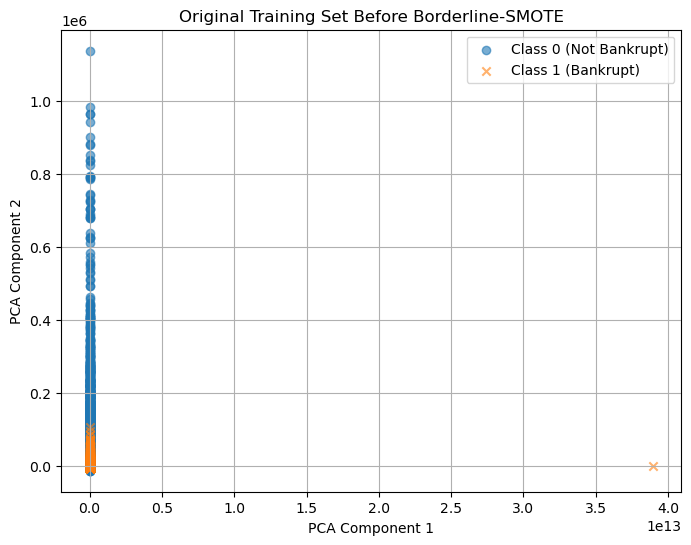

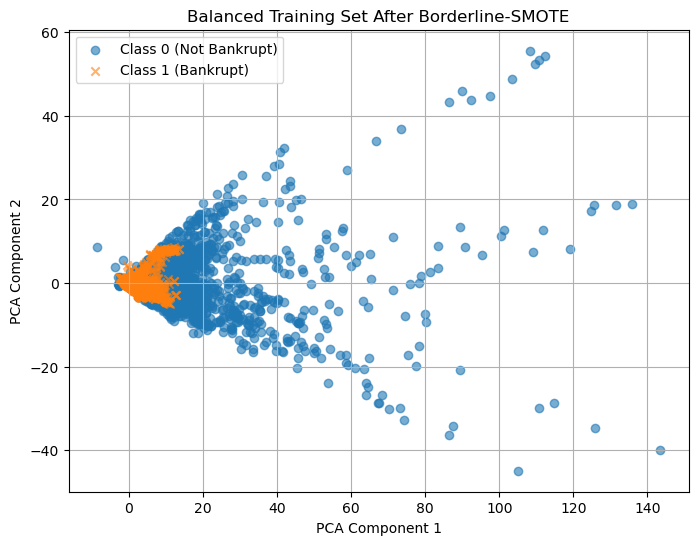

In [96]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Function to visualize the data
def visualize_data(X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)  # Reduce to 2 components for 2D plotting
    
    plt.figure(figsize=(8,6))
    plt.scatter(X_pca[y == 0][:, 0], X_pca[y == 0][:, 1], label="Class 0 (Not Bankrupt)", alpha=0.6)
    plt.scatter(X_pca[y == 1][:, 0], X_pca[y == 1][:, 1], label="Class 1 (Bankrupt)", alpha=0.6, marker='x')
    
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize original training set before Borderline-SMOTE
visualize_data(X_train, y_train, title="Original Training Set Before Borderline-SMOTE")

# Visualize the balanced training set after applying Borderline-SMOTE
visualize_data(X_train_balanced, y_train_balanced, title="Balanced Training Set After Borderline-SMOTE")


In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the trained models
trained_models = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Store the trained model in the dictionary
    trained_models[model_name] = model
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

    # Print evaluation metrics
    print(f"Model: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nROC AUC Score:")
    print(roc_auc_score(y_test, y_pred_proba))
    print("-" * 60)

# The trained models are now stored in the trained_models dictionary

Model: Logistic Regression
Confusion Matrix:
[[14575   118]
 [ 1007    37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     14693
           1       0.24      0.04      0.06      1044

    accuracy                           0.93     15737
   macro avg       0.59      0.51      0.51     15737
weighted avg       0.89      0.93      0.90     15737


ROC AUC Score:
0.6746970499414191
------------------------------------------------------------
Model: Decision Tree
Confusion Matrix:
[[12981  1712]
 [  591   453]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     14693
           1       0.21      0.43      0.28      1044

    accuracy                           0.85     15737
   macro avg       0.58      0.66      0.60     15737
weighted avg       0.91      0.85      0.88     15737


ROC AUC Score:
0.6586949880739206
---------------------

In [99]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define base models
base_models = [
    ('logistic', LogisticRegression(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Define meta-learner
meta_model = LogisticRegression(random_state=42)

# Create stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacking model on the balanced training set
stacking_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)
y_pred_stack_proba = stacking_model.predict_proba(X_test)[:, 1]  # Get probabilities for ROC-AUC

# Print evaluation metrics for the stacking model
print("Stacking Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_stack_proba))


Stacking Model
Confusion Matrix:
[[14371   322]
 [  631   413]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14693
           1       0.56      0.40      0.46      1044

    accuracy                           0.94     15737
   macro avg       0.76      0.69      0.72     15737
weighted avg       0.93      0.94      0.93     15737


ROC AUC Score:
0.8591399245815963


In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
base_models = [
    ('logistic', LogisticRegression(random_state=42)),
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Set Random Forest as the final meta-learner
meta_model_rf = RandomForestClassifier(random_state=42, n_estimators=50)

# Create the stacking classifier with Random Forest as the meta-learner
stacking_model1 = StackingClassifier(estimators=base_models, final_estimator=meta_model_rf, cv=5)  # Reduced cv to 3

# Define a StratifiedKFold for better progress tracking
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Train the stacking model and print evaluation metrics
print("\nTraining Stacking Model with Random Forest Meta-Learner...")

for fold, (train_index, val_index) in enumerate(kf.split(X_train_balanced, y_train_balanced), 1):
    X_train_fold, X_val_fold = X_train_balanced[train_index], X_train_balanced[val_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[val_index]
    
    stacking_model1.fit(X_train_fold, y_train_fold)  # Train on current fold
    
    # Print progress
    print(f"  Training fold {fold}/{kf.n_splits}...")

# Make predictions on the test set
y_pred = stacking_model1.predict(X_test)
y_pred_proba = stacking_model1.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_proba))


Training Stacking Model with Random Forest Meta-Learner...
  Training fold 1/3...
  Training fold 2/3...
  Training fold 3/3...

Confusion Matrix:
[[14212   481]
 [  619   425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     14693
           1       0.47      0.41      0.44      1044

    accuracy                           0.93     15737
   macro avg       0.71      0.69      0.70     15737
weighted avg       0.93      0.93      0.93     15737


ROC AUC Score:
0.8212547390748011


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'none'],      # Regularization type
    'solver': ['lbfgs', 'liblinear', 'saga']  # Optimizers
}

logistic_model = LogisticRegression(random_state=42)

# Perform Randomized Search
logistic_search = RandomizedSearchCV(estimator=logistic_model,
                                     param_distributions=logistic_params,
                                     n_iter=10,
                                     cv=5,
                                     verbose=1,
                                     n_jobs=-1,
                                     random_state=42)

logistic_search.fit(X_train_balanced, y_train_balanced)

# Best Logistic Regression hyperparameters
best_logistic = logistic_search.best_estimator_
print(f"Best Logistic Regression Hyperparameters: {logistic_search.best_params_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\_p

Best Logistic Regression Hyperparameters: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}


In [102]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
tree_params = {
    'max_depth': [5, 10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

tree_model = DecisionTreeClassifier(random_state=42)

# Perform Randomized Search
tree_search = RandomizedSearchCV(estimator=tree_model,
                                 param_distributions=tree_params,
                                 n_iter=10,
                                 cv=5,
                                 verbose=1,
                                 n_jobs=-1,
                                 random_state=42)

tree_search.fit(X_train_balanced, y_train_balanced)

# Best Decision Tree hyperparameters
best_tree = tree_search.best_estimator_
print(f"Best Decision Tree Hyperparameters: {tree_search.best_params_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Decision Tree Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'gini'}


In [103]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier(random_state=42)

# Perform Randomized Search
rf_search = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_params,
                               n_iter=10,
                               cv=5,
                               verbose=1,
                               n_jobs=-1,
                               random_state=42)

rf_search.fit(X_train_balanced, y_train_balanced)

# Best Random Forest hyperparameters
best_rf = rf_search.best_estimator_
print(f"Best Random Forest Hyperparameters: {rf_search.best_params_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Random Forest Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
gb_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search
gb_search = RandomizedSearchCV(estimator=gb_model,
                               param_distributions=gb_params,
                               n_iter=10,
                               cv=5,
                               verbose=1,
                               n_jobs=-1,
                               random_state=42)

gb_search.fit(X_train_balanced, y_train_balanced)

# Best Gradient Boosting hyperparameters
best_gb = gb_search.best_estimator_
print(f"Best Gradient Boosting Hyperparameters: {gb_search.best_params_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Gradient Boosting Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.1}


In [105]:
from sklearn.ensemble import StackingClassifier

# Define meta-learner (Logistic Regression, tuned previously)
meta_model = LogisticRegression(random_state=42)

# Create the Stacking Classifier with tuned base models
stacking_model_tuned = StackingClassifier(estimators=[
    ('logistic', best_logistic),
    ('decision_tree', best_tree),
    ('random_forest', best_rf),
    ('gradient_boosting', best_gb)
], final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model_tuned.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_stack_tuned = stacking_model_tuned.predict(X_test)
y_pred_stack_proba_tuned = stacking_model_tuned.predict_proba(X_test)[:, 1]

# Evaluate tuned model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Tuned Stacking Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stack_tuned))
print("\nROC AUC Score:")
print(roc_auc_score(y_test, y_pred_stack_proba_tuned))


Tuned Stacking Model
Confusion Matrix:
[[14350   343]
 [  637   407]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14693
           1       0.54      0.39      0.45      1044

    accuracy                           0.94     15737
   macro avg       0.75      0.68      0.71     15737
weighted avg       0.93      0.94      0.93     15737


ROC AUC Score:
0.8598070262039968


PermutationExplainer explainer: 15738it [7:15:50,  1.66s/it]                                                           


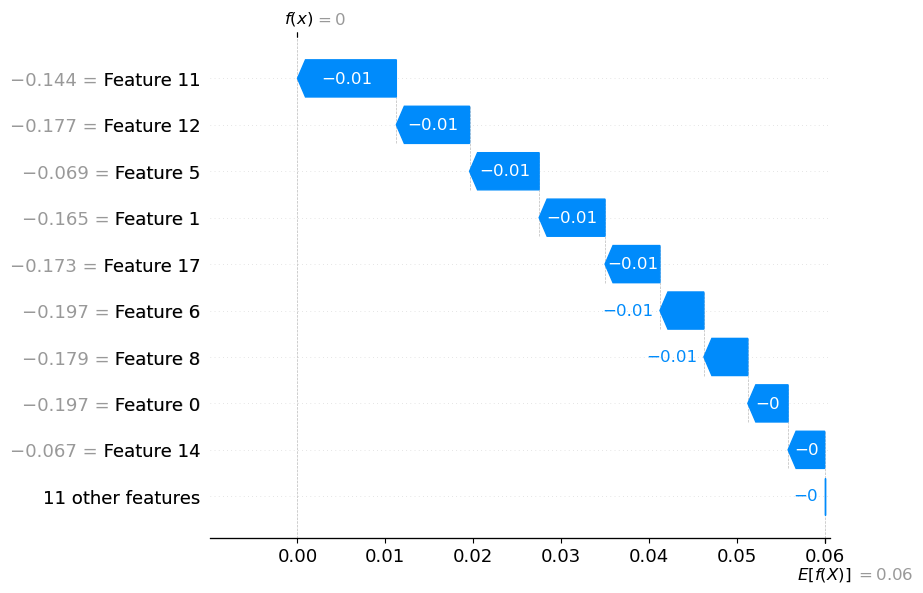

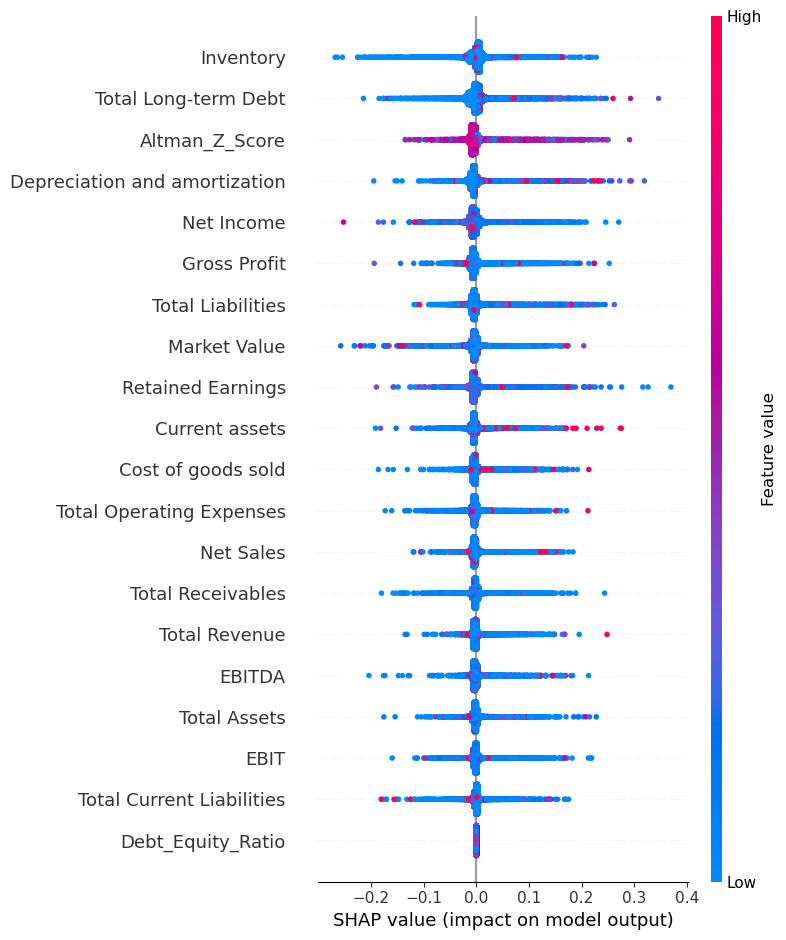

In [114]:
import shap

# Initialize the SHAP Permutation Explainer
explainer_perm = shap.PermutationExplainer(stacking_model_tuned.predict, X_test)

# Compute SHAP values
shap_values_perm = explainer_perm(X_test)

# Visualize SHAP values for one instance (e.g., the first instance in the test set)
shap.plots.waterfall(shap_values_perm[0])  # Explanation for the first instance

# Summary plot for all instances
shap.summary_plot(shap_values_perm, X_test, feature_names=X.columns)


In [115]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_train_balanced, feature_names=X.columns, class_names=['Not Bankrupt', 'Bankrupt'], mode='classification')

# Explain a single prediction
i = 0  # Index of the instance in X_test you want to explain
exp = explainer.explain_instance(X_test[i], stacking_model_tuned.predict_proba)

# Get the list of features and their contributions from LIME's explanation
explanation_list = exp.as_list()

# Create lists to store the factors that increase and decrease the likelihood of bankruptcy
increase_risk = []
decrease_risk = []

# Categorize the feature contributions into two groups
for feature, contribution in explanation_list:
    if contribution > 0:
        increase_risk.append(f"{feature}")
    else:
        decrease_risk.append(f"{feature}")

# Format the output in a clear and structured way
print("Pointwise Recommendation based on LIME Analysis:\n")

print("**Factors that Decrease the Likelihood of Bankruptcy:**")
for feature in decrease_risk:
    print(f"- {feature}")

print("\n**Factors that Increase the Likelihood of Bankruptcy:**")
for feature in increase_risk:
    print(f"- {feature}")

# Show the explanation in a notebook (if you're using a notebook environment)
exp.show_in_notebook(show_table=True)


Pointwise Recommendation based on LIME Analysis:

**Factors that Decrease the Likelihood of Bankruptcy:**
- -0.21 < Current assets <= -0.19
- Market Value <= -0.16
- -0.07 < Net Income <= -0.05
- -0.15 < EBIT <= -0.10
- Debt_Equity_Ratio > -0.01
- -0.18 < Net Sales <= -0.11

**Factors that Increase the Likelihood of Bankruptcy:**
- -0.20 < Total Current Liabilities <= -0.19
- -0.18 < Inventory <= -0.11
- -0.08 < Retained Earnings <= -0.06
- -0.22 < Total Liabilities <= -0.14


In [1]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Placeholder for model and explainer initialization
# stacking_model_tuned should be defined and trained
# X_train_balanced should be your balanced training data
# X should be your full dataset for feature names

# Initialize the LIME explainer
explainer = LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Not Bankrupt', 'Bankrupt'], mode='classification')

# Create the main application window
app = tk.Tk()
app.title("Bankruptcy Prediction Feature Input")
app.geometry("500x800")

# Define the feature labels and inputs dictionary
feature_labels = list(X.columns[:18])  # Assuming we need the first 18 columns as features
inputs = {}

# Function to explain instance using LIME
def explain_instance():
    try:
        # Collect all inputs from the UI
        user_input = [float(inputs[feature].get()) for feature in feature_labels]
        user_instance = np.array(user_input).reshape(1, -1)
        
        # Explain the instance
        exp = explainer.explain_instance(user_instance[0], stacking_model_tuned.predict_proba, num_samples=500)

        
        # Parse explanation and display in a message box
        explanation_list = exp.as_list()
        increase_risk = [f"{feature}" for feature, contrib in explanation_list if contrib > 0]
        decrease_risk = [f"{feature}" for feature, contrib in explanation_list if contrib <= 0]
        
        message = "Factors that Decrease the Likelihood of Bankruptcy:\n" + "\n".join(f"- {f}" for f in decrease_risk) + \
                  "\n\nFactors that Increase the Likelihood of Bankruptcy:\n" + "\n".join(f"- {f}" for f in increase_risk)
        messagebox.showinfo("LIME Explanation", message)
        
    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values for all fields.")

# Layout for input fields
for i, label in enumerate(feature_labels):
    tk.Label(app, text=label).grid(row=i, column=0, pady=5, sticky="e")
    entry = tk.Entry(app)
    entry.grid(row=i, column=1, pady=5)
    inputs[label] = entry

# Add Explain button
tk.Button(app, text="Explain Instance", command=explain_instance).grid(row=len(feature_labels), column=1, pady=20)

# Run the app
app.mainloop()


NameError: name 'X_train' is not defined